In [1]:
%pylab inline
import matplotlib
import numpy as np
import pandas as pd
from matplotlib.ticker import (AutoMinorLocator)
import matplotlib.ticker as ticker

# for function for contours
from scipy.stats import kde

# this is just to make notebook span the whole page
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Populating the interactive namespace from numpy and matplotlib


In [2]:
# things to make the plot pretty
rc('axes', linewidth=3)
rc('font', weight='bold')
rcParams["figure.figsize"] = (15,8)
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20
rcParams['axes.labelsize'] = 30
rcParams['xtick.major.pad'] = 8
rcParams['mathtext.default'] = 'regular'

In [3]:
# for reproducibility
np.random.seed(2020323)

-----

### Define (or load in) your data (we define two populations here):

In [4]:
x1_samples = np.random.multivariate_normal(np.array([-1,-1]), np.array([[2,0],[0,2]]), 100)
x2_samples = np.random.multivariate_normal(np.array([2,2]), np.array([[1,0],[0,1]]), 200)

### View the data as a scatter plot:

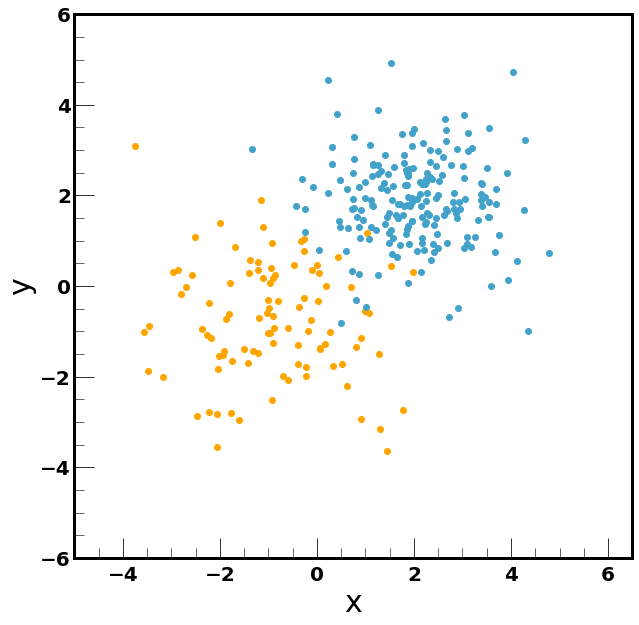

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x1_samples[:,0],x1_samples[:,1], color='orange', label=r'Distr. 1')
ax.scatter(x2_samples[:,0],x2_samples[:,1], color='#43a2ca', label=r'Distr. 2')
ax.set_xlabel(r'x')
ax.set_ylabel(r'y')
ax.set_xlim(-5,6.5)
ax.set_ylim(-6,6)

ax.xaxis.set_minor_locator(AutoMinorLocator()) 
ax.yaxis.set_minor_locator(AutoMinorLocator()) 
ax.tick_params(which='minor',length=10,direction="in", left="off",labelleft="on")
ax.tick_params(which='major',length=20,direction="in", left="off",labelleft="on")
    
plt.show()

### The code to make the marginal distribution contour plot (mostly taken from stackexchange but modified by me):

In [6]:
def my_lin(lb, ub, steps, spacing=spacing):
### my_lin - function to create unevenly spaced levels ###
    span = (ub-lb)
    dx = 1.0 / (steps-1)
    return [lb + (i*dx)**spacing*span for i in range(steps)]

def contour_level_hist(x, y, ax, ax_histx, ax_histy, levels=25, spacing=1.0, color='#43a2ca', label=None, leg_loc=None, alpha=1):
### contour_level_hist - function to create the marginal distribution plot ###
# x - array of x data
# y - array of y data
# ax - axis for the main contour plot
# ax_histx - axis for the top histogram plot
# ax_histy - axis for the side histogram plot
# levels - number of contour levels you want to see in the contour plot (default=25)
# spacing - spacing for my_lin() function to create unevenly spaced contour levels
#           spacing = 1 means equally spaced levels (default)
#           spacing < 1 means more levels near upper bound
#           spacing > 1 means more levels near lower bound
# color - color for both contour and histogram plots (default='#43a2ca', a nice blue that I like)
# label - label for the legend (default=None)
# leg_loc - location of the legend (default=None) - if plotting multiple contour plots in the same figure, specify this in the last contour plot as that legend is the one that will show
# alpha - transparency of the histograms
    
    # no labels on the bottom of the top plot or to the left of the side plot
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the contour plot:
    deltaX = (x.max() - x.min())/10
    deltaY = (y.max() - y.min())/10
    xmin = x.min() - deltaX
    xmax = x.max() + deltaX
    ymin = y.min() - deltaY
    ymax = y.max() + deltaY
    
    xx, yy = np.mgrid[xmin:xmax:300j, ymin:ymax:300j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x.flatten(), y.flatten()])
    kernel = kde.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    
    levels = my_lin(f.min(), f.max(), levels, spacing=spacing)
    
    cset = ax.contour(xx, yy, f, levels=levels, colors=color)
    
    # make the tick marks look nice
    ax.xaxis.set_minor_locator(AutoMinorLocator()) 
    ax.tick_params(which='minor',length=10,direction="in", left="off",labelleft="on")
    ax.tick_params(which='major',length=20,direction="in", left="off",labelleft="on")
    
    if label != None:
        labels = [label]
        for i in range(len(labels)):
            cset.collections[i].set_label(labels[i])
        ax.legend(prop={'weight':'normal', 'size':25}, loc=leg_loc)

    # now determine nice histogram bin limits
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    
    # the histogram plots:
    ax_histx.hist(x, bins=bins, color=color, alpha=alpha)
    ax_histx.set_yscale('log')
    ax_histx.xaxis.set_minor_locator(AutoMinorLocator()) 
    ax_histx.tick_params(which='minor',length=10,direction="in", left="off")
    ax_histx.tick_params(which='major',length=20,direction="in", left="off")
    
    locmaj = ticker.LogLocator(base=10,numticks=6) 
    ax_histx.yaxis.set_major_locator(locmaj)
    
    ax_histy.hist(y, bins=bins, color=color, alpha=alpha, orientation='horizontal')
    ax_histy.set_xscale('log')
    ax_histy.yaxis.set_minor_locator(AutoMinorLocator()) 
    ax_histy.tick_params(which='minor',length=10,direction="in", left="off",labelleft=False)
    ax_histy.tick_params(which='major',length=20,direction="in", left="off",labelleft=False)

### The plot:

Text(0.5, 0, 'log(N)')

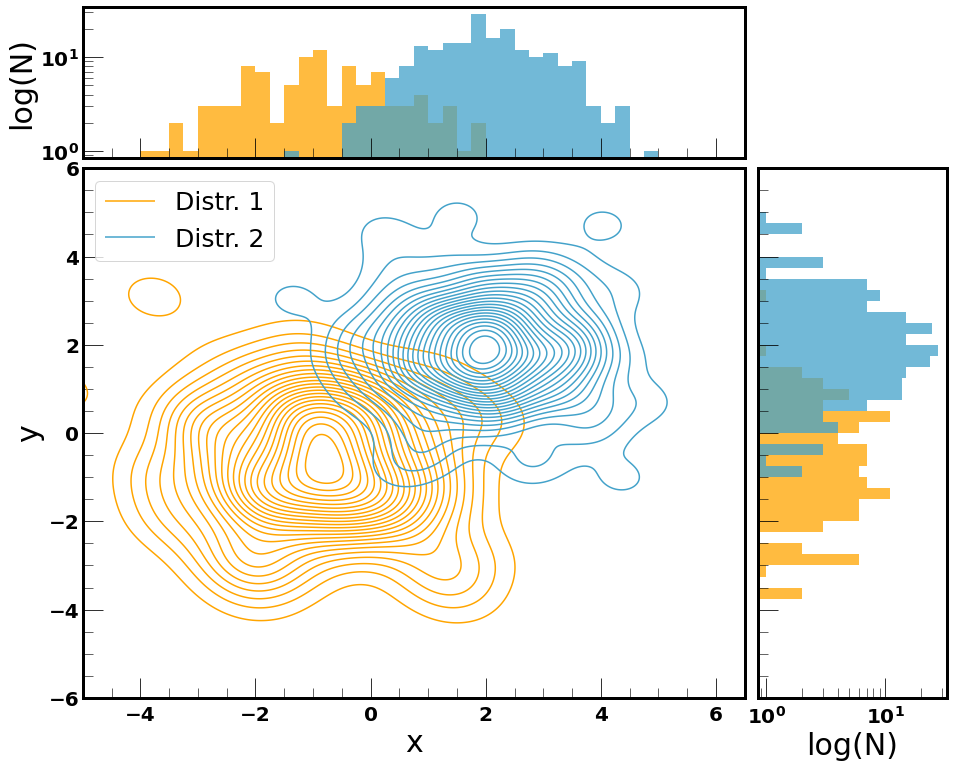

In [7]:
fig = plt.figure(figsize=(15, 12))

# Add a gridspec with two rows and two columns and a ratio of 2 to 7 between the size of the marginal axes and the main axes in both directions.
gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.03, hspace=0.03)

# make the axes
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

# use the previously defined function
contour_level_hist(x1_samples[:,0], x1_samples[:,1], ax, ax_histx, ax_histy, spacing=1.0, color='orange', alpha=0.75, label='Distr. 1')
contour_level_hist(x2_samples[:,0], x2_samples[:,1], ax, ax_histx, ax_histy, spacing=1.2, alpha=0.75, label='Distr. 2', leg_loc='upper left') # put leg_loc in this call

# add labels and x and y limits
ax.set_xlabel(r'x')
ax.set_ylabel(r'y')
ax.set_xlim(-5,6.5)
ax.set_ylim(-6,6)

ax_histx.set_ylabel(r"log(N)")
ax_histy.set_xlabel(r"log(N)")

# save the figure
#savefig("mass_vs_z_contour.pdf", bbox_inches='tight')